# Predicting Heart Disease using machine learning
This notebook looks into using various Python-based machine learning
and data science libraries in an attempt to build a ML model
capable of predicting whether or not someone has heart disease based on
their medical attributes.

### Load all tools

In [46]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score

### Load Data

In [47]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [48]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [49]:
# df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
#       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# df['sex'][df['sex'] == 0] = 'female'
# df['sex'][df['sex'] == 1] = 'male'

In [50]:
# Let's see how many positive (1) and negative (0) samples we have dataframe
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [51]:
# Normalized value counts
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [52]:
df[df.sex == 0].value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
34   0    1   118       210   0    1        192      0      0.7      2      0   2     1         1
35   0    0   138       183   0    1        182      0      1.4      2      0   2     1         1
62   0    2   130       263   0    1        97       0      1.2      1      1   3     0         1
          0   160       164   0    0        145      0      6.2      0      3   3     0         1
              150       244   0    1        154      1      1.4      1      0   2     0         1
                                                                                               ..
51   0    2   130       256   0    0        149      0      0.5      2      0   2     1         1
              120       295   0    0        157      0      0.6      2      0   2     1         1
          0   130       305   0    1        142      1      1.2      1      0   3     0         1
50   0    2   120       2

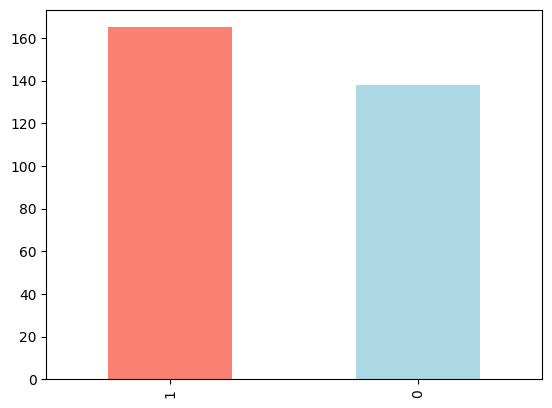

In [53]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [55]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [56]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [57]:
df.groupby(["sex", "target"]).value_counts()

sex  target  age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal
0    0       43   0   132       341   1    0        136      1      3.0      1      0   3       1
             51   0   130       305   0    1        142      1      1.2      1      0   3       1
             62   2   130       263   0    1        97       0      1.2      1      1   3       1
                  0   150       244   0    1        154      1      1.4      1      0   2       1
                      140       268   0    0        160      0      3.6      0      2   2       1
                                                                                               ..
1    1       51   2   100       222   0    1        143      1      1.2      1      0   2       1
                      94        227   0    1        154      1      0.0      2      1   3       1
                  0   140       261   0    0        186      1      0.0      2      0   2       1
             50   2   129

In [58]:
sex_size = df.sex.value_counts()

In [59]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [60]:
female_heart_disease = df[(df.target == 1) & (df.sex == 0)].value_counts()
fhd = female_heart_disease.count()

In [61]:
female_no_heart_disease = df[(df.target == 0) & (df.sex == 0)].value_counts()
fnhd = female_no_heart_disease.count()

In [62]:
male_heart_disease = df[(df.target == 1) & (df.sex == 1)].value_counts()
mhd = male_heart_disease.count()
mhd

92

In [63]:
male_no_heart_disease = df[(df.target == 0) & (df.sex == 1)].value_counts()
mnhd = male_no_heart_disease.count()
mnhd

114

In [64]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex, normalize="columns")

sex,0,1
target,,
0,0.25,0.550725
1,0.75,0.449275


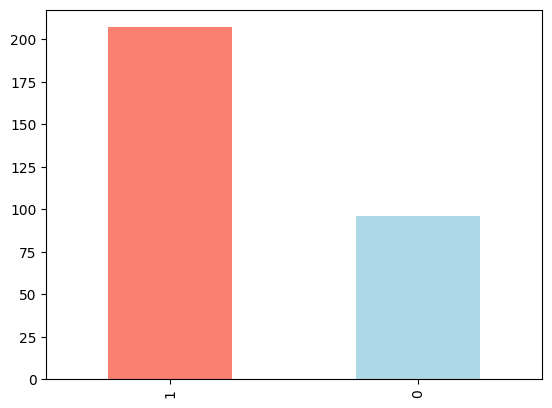

In [65]:
df["sex"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

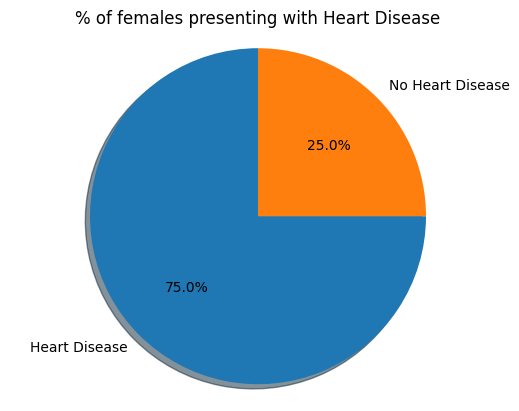

In [66]:
# From the the data: Percentage of females that have heart disease
sizes = [fhd, fnhd]
labels = "Heart Disease", "No Heart Disease"
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of females presenting with Heart Disease")
ax.axis("equal") ;

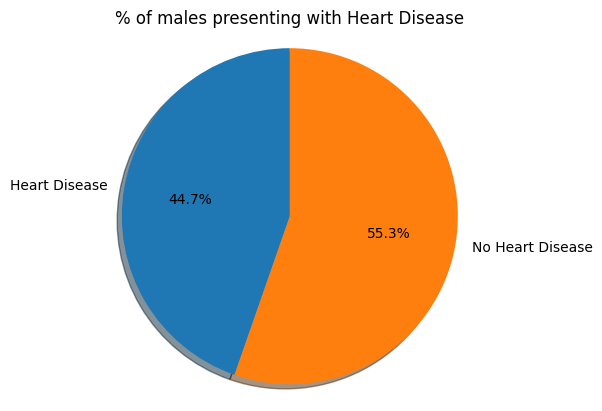

In [67]:
# From the the data: Percentage of males that have heart disease
sizes = [mhd, mnhd]
labels = "Heart Disease", "No Heart Disease"
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of males presenting with Heart Disease")
ax.axis("equal") ;

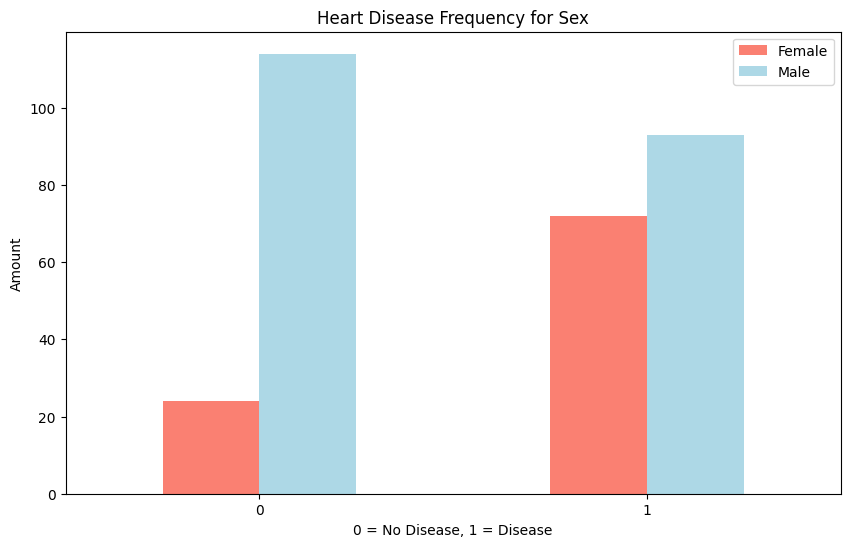

In [68]:
# for the above we develop an intiution on the data - around 75% of females
# presenting with the features in the dataset are likely to have HD.
# and around 50% for men.  Therefore we want our predictions to beat this percentage.

# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

In [69]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

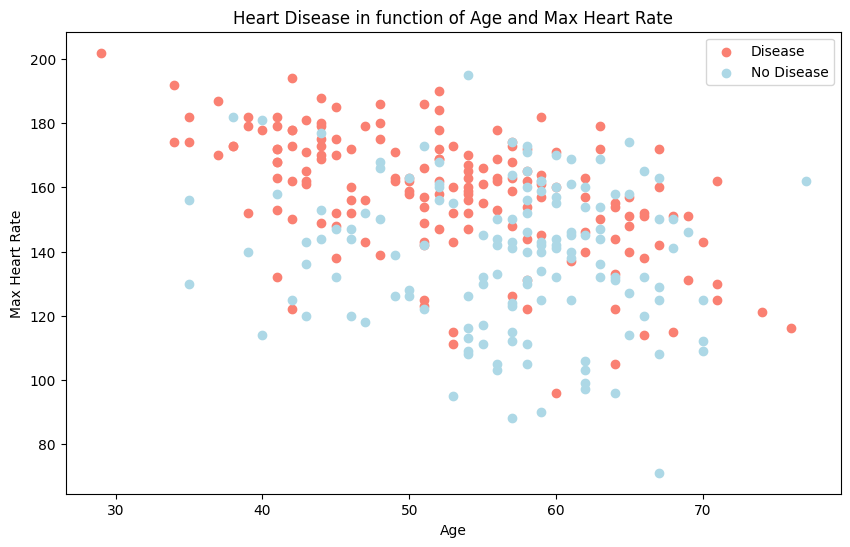

In [70]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

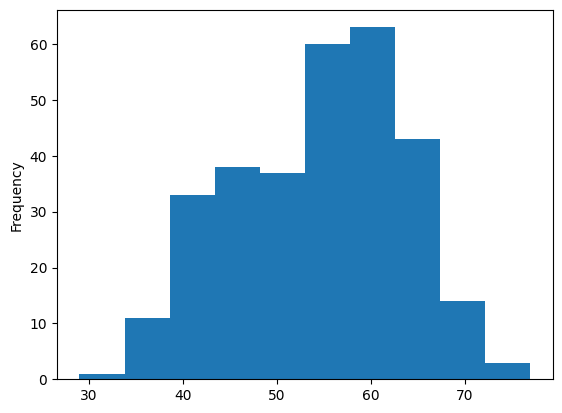

In [71]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest pain type

3. cp = chest pain type (4 values)
    - 0: Typical angina: chest pain related decrease bloody supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-angina pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs of disease

In [72]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


restecg - resting electrocardiographic results (values 0,1,2)

    0: nothing to note
    1: ST-T Wave abnormality
    2: Possible or definite left ventricular hypertrophy

In [73]:
pd.crosstab(df.restecg, df.target)

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


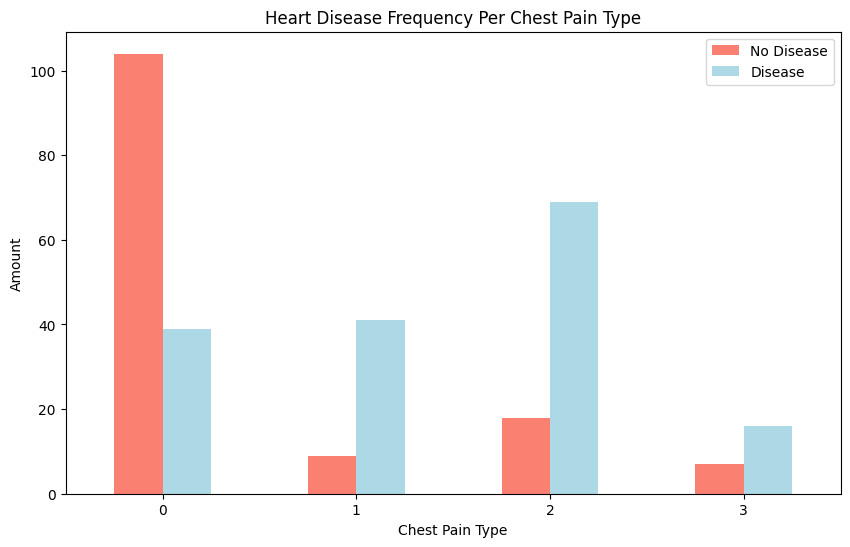

In [74]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=("salmon", "lightblue"))

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [75]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
# Make a correlation a matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


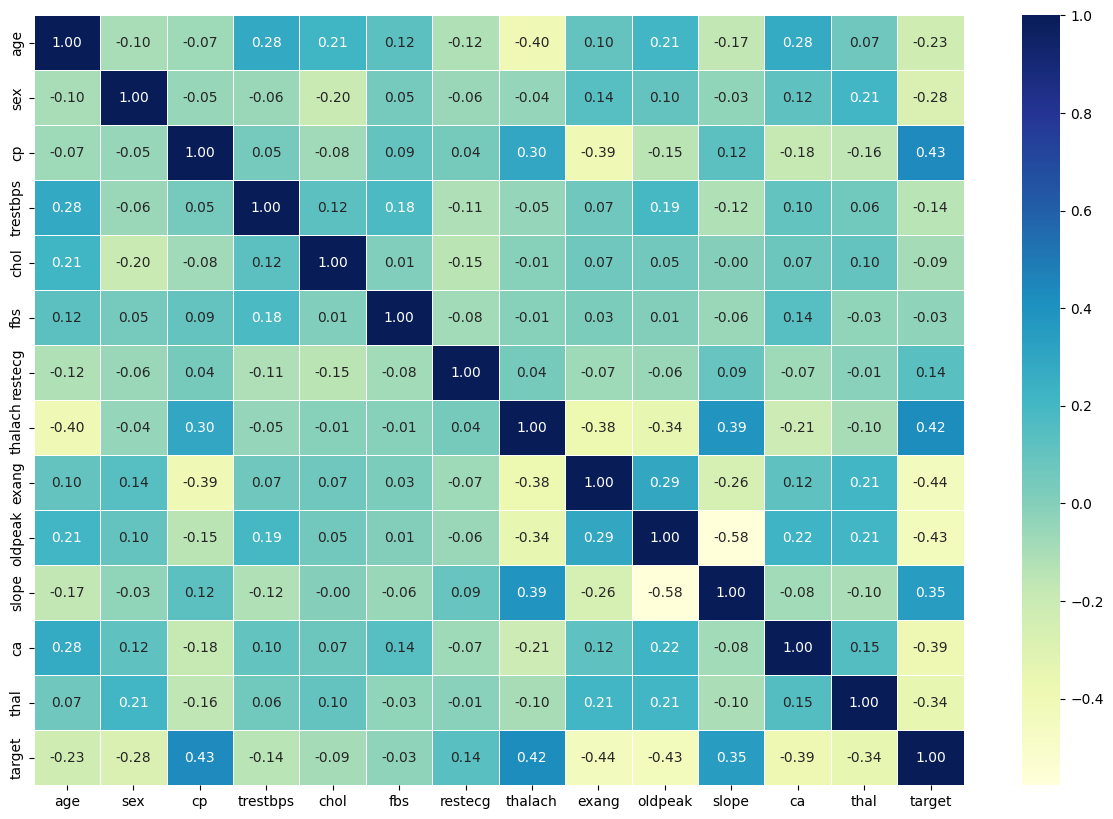

In [77]:
# Make our correlation matrix a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu");

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

## 5. Modelling

In [78]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [80]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [81]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

### CatBoost

In [82]:
!pip install catboost

In [83]:
from catboost import CatBoostClassifier

In [84]:
params = {'learning_rate': 0.1, 'depth': 6,
          'l2_leaf_reg': 3, 'iterations': 100}

In [85]:
cb = CatBoostClassifier(**params)
cb.fit(X_train, y_train)

0:	learn: 0.6629832	total: 736us	remaining: 72.9ms
1:	learn: 0.6377309	total: 1.72ms	remaining: 84.4ms
2:	learn: 0.6151428	total: 2.51ms	remaining: 81.3ms
3:	learn: 0.5961557	total: 3ms	remaining: 72.1ms
4:	learn: 0.5767750	total: 3.47ms	remaining: 65.9ms
5:	learn: 0.5619302	total: 3.96ms	remaining: 62.1ms
6:	learn: 0.5433554	total: 4.5ms	remaining: 59.8ms
7:	learn: 0.5301148	total: 5.06ms	remaining: 58.2ms
8:	learn: 0.5174984	total: 5.57ms	remaining: 56.3ms
9:	learn: 0.5043598	total: 7.17ms	remaining: 64.5ms
10:	learn: 0.4919421	total: 7.65ms	remaining: 61.9ms
11:	learn: 0.4821268	total: 8.13ms	remaining: 59.6ms
12:	learn: 0.4739858	total: 8.62ms	remaining: 57.7ms
13:	learn: 0.4653083	total: 9.04ms	remaining: 55.5ms
14:	learn: 0.4547766	total: 9.5ms	remaining: 53.8ms
15:	learn: 0.4451742	total: 9.94ms	remaining: 52.2ms
16:	learn: 0.4356467	total: 10.4ms	remaining: 50.7ms
17:	learn: 0.4286095	total: 10.8ms	remaining: 49.3ms
18:	learn: 0.4209980	total: 11.3ms	remaining: 48ms
19:	learn: 

In [86]:
# Make predictions for test data
y_pred = cb.predict(X_test)
predictions = [round(value) for value in y_pred]

In [87]:
accuracy00 = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy00 * 100.0))

Accuracy: 85.25%


### CatBoost with GridSearchCV


In [88]:
# Different hyperparameters for our CatBoost model
gs_cat_params = {"depth": [4,5,6,7,8,9,10],
               "learning_rate": [0.01,0.02,0.03,0.04],
                "iterations": [10, 20,30,40,50,60,70,80,90,100],
                "l2_leaf_reg": [2,3,4,5,6]}

In [89]:
gs_cat = GridSearchCV(CatBoostClassifier(),
                      param_grid=gs_cat_params,
                      cv=2,
                      verbose=True)

In [90]:
gs_cat.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
20:	learn: 0.6233929	total: 37.4ms	remaining: 123ms
21:	learn: 0.6215046	total: 40.2ms	remaining: 124ms
22:	learn: 0.6185211	total: 43ms	remaining: 125ms
23:	learn: 0.6161157	total: 45.9ms	remaining: 126ms
24:	learn: 0.6127514	total: 46.6ms	remaining: 121ms
25:	learn: 0.6105370	total: 49.7ms	remaining: 122ms
26:	learn: 0.6087778	total: 52.6ms	remaining: 123ms
27:	learn: 0.6071168	total: 55.7ms	remaining: 123ms
28:	learn: 0.6052929	total: 58.6ms	remaining: 123ms
29:	learn: 0.6024180	total: 61.6ms	remaining: 123ms
30:	learn: 0.6006501	total: 63.4ms	remaining: 121ms
31:	learn: 0.5989795	total: 66.3ms	remaining: 120ms
32:	learn: 0.5949891	total: 66.7ms	remaining: 115ms
33:	learn: 0.5929978	total: 68.5ms	remaining: 113ms
34:	learn: 0.5905487	total: 71.3ms	remaining: 112ms
35:	learn: 0.5886342	total: 74.2ms	remaining: 111ms
36:	learn: 0.5869247	total: 77.1ms	remaining: 110ms
37:	learn: 0.5851081	total: 80ms	remaining: 109ms
38:	learn: 0.5835

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7b306e3fffd0>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'l2_leaf_reg': [2, 3, 4, 5, 6],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             verbose=True)

In [91]:
gs_cat_bp = gs_cat.best_params_

In [92]:
gs_cat_bp

{'depth': 8, 'iterations': 30, 'l2_leaf_reg': 4, 'learning_rate': 0.02}

In [93]:
gs_cat_best = CatBoostClassifier(depth=gs_cat_bp["depth"],
                                 iterations=gs_cat_bp["iterations"],
                                 l2_leaf_reg=gs_cat_bp["l2_leaf_reg"],
                                 learning_rate=gs_cat_bp["learning_rate"])

In [94]:
gs_cat_best.fit(X_train, y_train)

0:	learn: 0.6888375	total: 1.48ms	remaining: 43ms
1:	learn: 0.6836877	total: 2.71ms	remaining: 37.9ms
2:	learn: 0.6792040	total: 4.14ms	remaining: 37.3ms
3:	learn: 0.6764566	total: 5.69ms	remaining: 37ms
4:	learn: 0.6734527	total: 7.08ms	remaining: 35.4ms
5:	learn: 0.6703499	total: 8.51ms	remaining: 34ms
6:	learn: 0.6666801	total: 10.3ms	remaining: 33.9ms
7:	learn: 0.6625677	total: 12.3ms	remaining: 33.9ms
8:	learn: 0.6603045	total: 14.7ms	remaining: 34.4ms
9:	learn: 0.6568975	total: 18.6ms	remaining: 37.3ms
10:	learn: 0.6530454	total: 22.2ms	remaining: 38.4ms
11:	learn: 0.6502339	total: 25.9ms	remaining: 38.9ms
12:	learn: 0.6472336	total: 27.2ms	remaining: 35.5ms
13:	learn: 0.6441455	total: 28.4ms	remaining: 32.5ms
14:	learn: 0.6407644	total: 29.6ms	remaining: 29.6ms
15:	learn: 0.6361821	total: 30.8ms	remaining: 26.9ms
16:	learn: 0.6323488	total: 31.9ms	remaining: 24.4ms
17:	learn: 0.6298178	total: 33.3ms	remaining: 22.2ms
18:	learn: 0.6251962	total: 33.8ms	remaining: 19.6ms
19:	learn

In [95]:
y_pred_gs_cat = gs_cat_best.predict(X_test)
predictions = [round(value) for value in y_pred_gs_cat]

In [96]:
# Evaluate predictions
accuracy06 = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy06 * 100.0))

Accuracy: 86.89%


### XGBoost

In [97]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
# Make predictions for test data
y_pred = xgboost.predict(X_test)
predictions = [round(value) for value in y_pred]

In [99]:
accuracy0 = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy0 * 100.0))

Accuracy: 81.97%


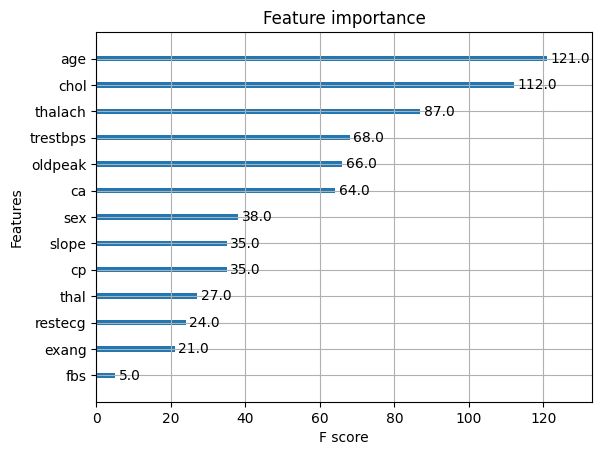

In [100]:
# Feature importance
plot_importance(xgboost)
plt.show()

### XGBoost with RandomizedSearchCV

In [101]:
xgb_classifier = XGBClassifier()

In [102]:
gbm_param_grid = {
    'n_estimators': range(1,20),
    'max_depth': range(1, 10),
    'learning_rate': [.1,.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'booster':["gbtree"],
     'min_child_weight': [0.001,0.003,0.01],
}

In [103]:
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid,
                                    estimator = xgb_classifier, scoring = "accuracy",
                                    verbose = 0, n_iter = 100, cv = 4)

In [104]:
xgb_random.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100,
                   param_distributions={'booster': ['gbtree'],
                                        'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'learning_rate': [0.1, 0.4, 0.45, 0.5,
                                                          0.55, 0.6],
                                        'max_depth': range(1, 10),
                                        'min_child_weight': [0.001, 0.003,
                                                             0.01],
                                        'n_estimators': range(1, 20)},
                   scoring='accuracy')

In [105]:
xgb_bp = xgb_random.best_params_

In [106]:
xgb_bp

{'n_estimators': 13,
 'min_child_weight': 0.003,
 'max_depth': 2,
 'learning_rate': 0.4,
 'colsample_bytree': 1,
 'booster': 'gbtree'}

In [107]:
xgb_best = XGBClassifier(n_estimators=xgb_bp["n_estimators"],
                          min_child_weight=xgb_bp["min_child_weight"],
                          max_depth=xgb_bp["max_depth"],
                          learning_rate=xgb_bp["learning_rate"],
                          colsample_bytree=xgb_bp["colsample_bytree"],
                          booster=xgb_bp["booster"])

In [108]:
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=0.003, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=13, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [109]:
# Make predictions for test data
y_pred = xgb_best.predict(X_test)
predictions = [round(value) for value in y_pred]

In [110]:
# Evaluate predictions
accuracy02 = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy02 * 100.0))

Accuracy: 83.61%


### LogisticRegression with RandomizedSearchCV

In [111]:
# Create hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"],
                "max_iter": range(100, 500)}

In [112]:
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=4,
                                n_iter=20,
                                verbose=True)

In [113]:
# Fit random hyperparameters search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': range(100, 500),
                                        'solver': ['liblinear']},
                   verbose=True)

In [114]:
rs_log_reg_bp = rs_log_reg.best_params_

In [115]:
log_reg_best = LogisticRegression(C=rs_log_reg_bp["C"],
                                  solver=rs_log_reg_bp["solver"],
                                  max_iter=rs_log_reg_bp["max_iter"])

In [116]:
log_reg_best.fit(X_train, y_train)

LogisticRegression(C=0.615848211066026, max_iter=236, solver='liblinear')

In [117]:
# Make predictions for test data
y_pred_log_reg_bp = log_reg_best.predict(X_test)
predictions = [round(value) for value in y_pred_log_reg_bp]

In [118]:
# Evaluate predictions
accuracy03 = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy03 * 100.0))

Accuracy: 86.89%


In [119]:
log_reg_best.score(X_test, y_test)

0.8688524590163934

### RandomForestClassifier with RandomizedSearchCV

In [120]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [121]:
# Setup random hyperparameters
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=4,
                          n_iter=20,
                          verbose=True)

In [122]:
# Fit hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [123]:
# Find the best hyperparameters
rs_rf_bp = rs_rf.best_params_

In [124]:
rs_rf_best = RandomForestClassifier(n_estimators=rs_rf_bp["n_estimators"],
                                    min_samples_split=rs_rf_bp["min_samples_split"],
                                    min_samples_leaf=rs_rf_bp["min_samples_leaf"],
                                    max_depth=rs_rf_bp["max_depth"])

In [125]:
rs_rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=18,
                       n_estimators=60)

In [126]:
y_pred_rs_rf = rs_rf_best.predict(X_test)
predictions = [round(value) for value in y_pred_rs_rf]

In [127]:
# Evaluate predictions
accuracy04 = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy04 * 100.0))

Accuracy: 88.52%


In [128]:
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Logistic Regression with GridSearchCV

In [129]:
# Different hyperparameters for our LogisticRegresson model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"],}


# Set up grid hyperparameters search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit our grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [130]:
# Check the best hyperparameters
gs_log_reg_bp = gs_log_reg.best_params_

In [131]:
gs_log_reg_bp

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [132]:
log_reg_best_grid = LogisticRegression(C=gs_log_reg_bp["C"],
                                  solver=gs_log_reg_bp["solver"])

In [133]:
log_reg_best_grid.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [134]:
y_pred_log_reg_grid = log_reg_best_grid.predict(X_test)
predictions = [round(value) for value in y_pred_log_reg_grid]

In [135]:
# Evaluate predictions
accuracy05 = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy05 * 100.0))

Accuracy: 88.52%


### All Models

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score

gs_cat_best
dtc = DecisionTreeClassifier()
lr = LogisticRegression(max_iter=10000)
gnb = GaussianNB()
lsvc = LinearSVC(max_iter=10000)
svc = SVC(max_iter=10000)
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
sgdc = SGDClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
xgb_best # best parameters from RandomizedSearchCV
log_reg_best
rs_rf_best
log_reg_best_grid

models = [gs_cat_best, dtc, lr, gnb, lsvc, svc, rfc,  knn, sgdc, gbc, xgb, xgb_best, log_reg_best, rs_rf_best, log_reg_best_grid]
model_name = ['CatBoost with GS', 'Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Linear SVC', 'SVC', 'Random Forest',
              'KNN or k-Nearest Neighbors', 'Stochastic Gradient Descent', 'Gradient Boosting', 'XGBoost', 'xgb_best', 'Log Reg Best', 'RF Best', 'LR-GridSearchCV']

acc_scores = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_model = round(accuracy_score(y_pred, y_test) * 100, 2)
    acc_scores.append(acc_model)

0:	learn: 0.6888375	total: 1.52ms	remaining: 44.2ms
1:	learn: 0.6836877	total: 2.29ms	remaining: 32.1ms
2:	learn: 0.6792040	total: 3.67ms	remaining: 33.1ms
3:	learn: 0.6764566	total: 5.06ms	remaining: 32.9ms
4:	learn: 0.6734527	total: 6.42ms	remaining: 32.1ms
5:	learn: 0.6703499	total: 7.62ms	remaining: 30.5ms
6:	learn: 0.6666801	total: 8.78ms	remaining: 28.9ms
7:	learn: 0.6625677	total: 10ms	remaining: 27.5ms
8:	learn: 0.6603045	total: 11.5ms	remaining: 26.9ms
9:	learn: 0.6568975	total: 12.9ms	remaining: 25.9ms
10:	learn: 0.6530454	total: 14.3ms	remaining: 24.7ms
11:	learn: 0.6502339	total: 15.7ms	remaining: 23.6ms
12:	learn: 0.6472336	total: 17.2ms	remaining: 22.5ms
13:	learn: 0.6441455	total: 18.6ms	remaining: 21.3ms
14:	learn: 0.6407644	total: 20.1ms	remaining: 20.1ms
15:	learn: 0.6361821	total: 21.4ms	remaining: 18.8ms
16:	learn: 0.6323488	total: 22.8ms	remaining: 17.4ms
17:	learn: 0.6298178	total: 24.1ms	remaining: 16.1ms
18:	learn: 0.6251962	total: 24.7ms	remaining: 14.3ms
19:	l

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [137]:
models_acc = pd.DataFrame({'Model name': model_name, 'Accuracy scores': acc_scores})
models_acc.sort_values(by='Accuracy scores', ascending=False)

,Model name,Accuracy scores
2,Logistic Regression,88.52
4,Linear SVC,88.52
14,LR-GridSearchCV,88.52
0,CatBoost with GS,86.89
3,Gaussian Naive Bayes,86.89
12,Log Reg Best,86.89
13,RF Best,85.25
1,Decision Tree,83.61
6,Random Forest,83.61
11,xgb_best,83.61


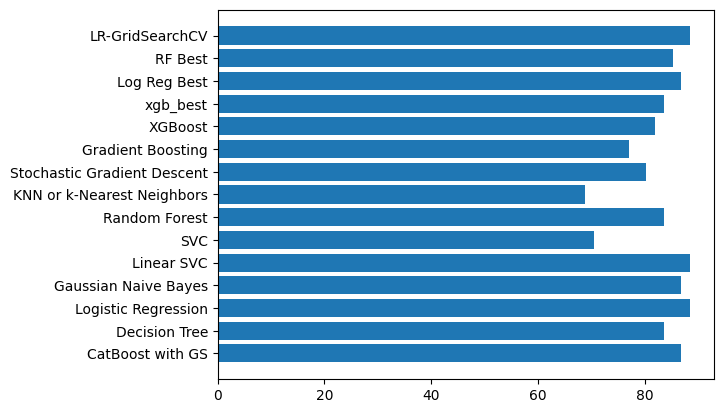

In [138]:
fig, ax = plt.subplots()
ax.barh(model_name, acc_scores)
plt.show()

STOP

Now that we have training and test sets - it's time to build
a ML model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try three ML models:
1. Logistic Regression
2. K-Nearest Neighbours
3. Random Forest Classifier

In [139]:
# Put models into a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models: a dict of different SciKit Learn ML models
    X_train: training data (no lables)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [140]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

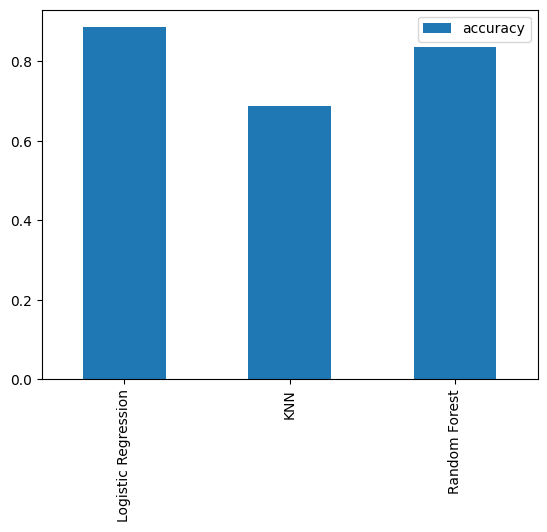

In [141]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have a baseline model and we know that a model's first
predictions are not what we should base our predictions off.

Let's look at the following:
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [142]:
# Lets tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


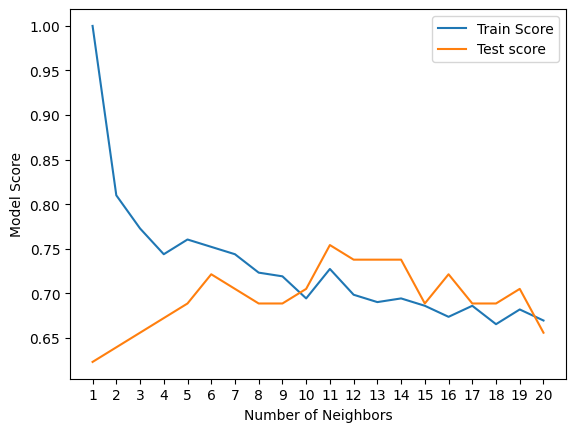

In [143]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


So the above exercise looked at how we could improve upon a score of
68% achieved for KNeigbors based on default parameters.

We took a range of KNN parameters from 1 - 20 and then plotted the results,
focusing on the test data.

Therefore, looking at the graph we can say that with a n_neigbor
parameter of 11 we would get a 75% model score which is better than 68% but still
not great so we can discard the K-Neigbors Classifier model.

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [144]:
# Create Hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

Now we've got hyperparameter grids set up for each of our models
Lets tune them using RandomizedSearchCV

In [145]:
import warnings
warnings.filterwarnings('ignore')

In [146]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameters search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [147]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [148]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), Let's do the same for Random Forest Classifier

In [149]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [150]:
# Setup Random seed
np.random.seed(42)

# Setup random hyperparameters
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [151]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [152]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [153]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Hyperparameter tuning
1. By hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameters Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far,
we'll try and improve them again with GridSearchCV

In [154]:
# Different hyperparameters for our LogisticRegresson model
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Set up grid hyperparameters search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit our grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [155]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [156]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [157]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned ML classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.


In [158]:
# Make predictions with tuned model
y_preds = knn.predict(X_test)

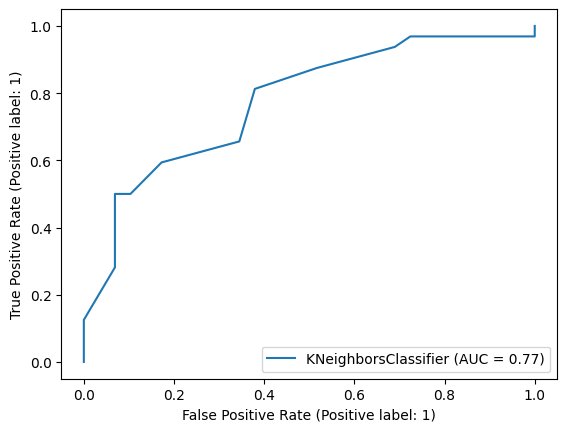

In [159]:
# Plot ROC curve and calculate and calculate AUC metric
RocCurveDisplay.from_estimator(estimator=knn,
                               X=X_test,
                               y=y_test);

In [160]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[19 10]
 [11 21]]


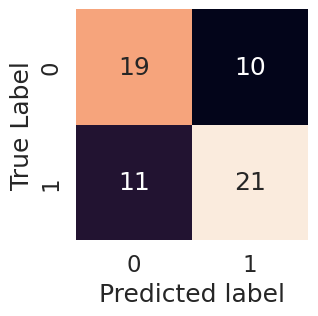

In [161]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True Label")

plot_conf_mat(y_test, y_preds)

Now we have a ROC curve, an AUC metrix, and a confusion matrix
Let's get a classification report and a cross validation, precision, recall,
and f1 score.

In [162]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64        29
           1       0.68      0.66      0.67        32

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.66      0.66      0.66        61



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall, f1-score of our model
using cross-validation and to do so we'll be using cross_val_score()

In [163]:
# Check best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [164]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [165]:
# Cross validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [166]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [167]:
# Cross validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [168]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [169]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [170]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [171]:
# Cross validated F1 score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [172]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

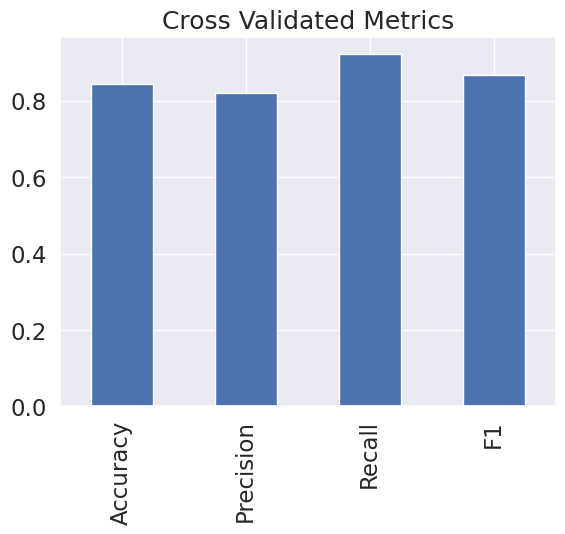

In [173]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title="Cross Validated Metrics", legend=False);

### Feature Importance

Feature Importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "Model name" feature importance.

Let's find feature importance for our LogisticRegression model.

In [174]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train);

In [175]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [176]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

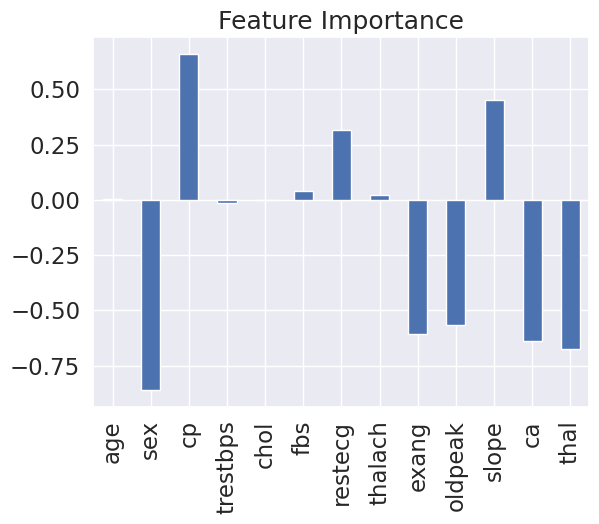

In [177]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## 6. Experimentation

If you havent already hit your evaluation metrix yet...ask yourself...
* Could you collect more data?
* Could you try a better model? CatBoost or XGBoost?
* Could you improve the current models?
* If your model is good enough (you've hit your evaluation metric
                              how would you share it with others?)